# Optimizing Levelset Filtrations

First, make sure your version of BATS.py is up-to-date...

In [1]:
import bats
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def freudenthal_grid(m, n):
    """
    Freudenthal triangulation of a m x n grid
    """
    
    def _get_idx(i, j):
        """
        get index of grid in row-major order
        """
        return j + n * i;
    
    
    X = bats.SimplicialComplex()
    
    for i in range(m-1):
        for j in range(n-1):
            k1 = _get_idx(i,j)
            k2 = _get_idx(i+1,j)
            k3 = _get_idx(i,j+1)
            k4 = _get_idx(i+1,j+1)
            X.add_recursive([k1,k2,k4])
            X.add_recursive([k1,k3,k4])

    return X

In [3]:
m = 100
n = 100
X = freudenthal_grid(m, n)

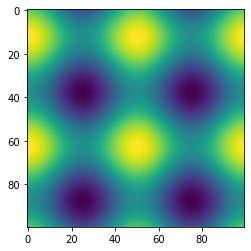

In [4]:
f = np.empty((m,n))
for i in range(m):
    for j in range(n):
        f[i,j] = np.sin(4*np.pi*i/m) + np.cos(4*np.pi*j/n)
        
plt.imshow(f)

now, we extend the image to a filtration on X

In [5]:
t0 = time.monotonic()
vals, imap = bats.lower_star_filtration(X, f.flatten())
t1 = time.monotonic()
print("time to extend: {} sec.".format(t1 - t0))

time to extend: 0.007938989001559094 sec.


We construct the filtered simplicial complex

In [6]:
t0 = time.monotonic()
F = bats.FilteredSimplicialComplex(X, vals)
t1 = time.monotonic()
print("time to construct: {} sec.".format(t1 - t0))

time to construct: 0.020181155006866902 sec.


In [7]:
t0 = time.monotonic()
R = bats.reduce(F, bats.F2())
t1 = time.monotonic()
print("time to reduce: {} sec.".format(t1 - t0))

time to reduce: 0.13945016601064708 sec.


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Birth', ylabel='Death'>)

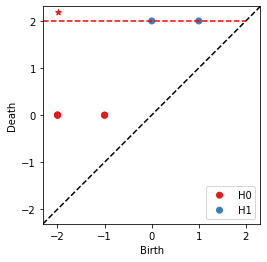

In [8]:
ps = R.persistence_pairs(0, False) +  R.persistence_pairs(1, False)
bats.persistence_diagram(ps)

In [9]:
nzps = []
for p in ps:
    if p.length() > 0:
        print(p)
        nzps.append(p)

0 : (-1.99803,inf) <3725,-1>
0 : (-1.99803,0.00197327) <3775,10979>
0 : (-1.99803,-0.00197327) <8825,18948>
0 : (-1.99803,-0.00197327) <8875,19098>
0 : (-1,-0.00197327) <51,4048>
0 : (-1,-0.00197327) <151,4198>
1 : (0.00197327,1.99803) <26177,12575>
1 : (1,1.99803) <203,2675>


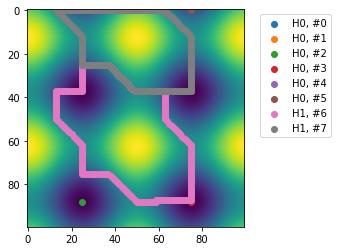

In [10]:
# visualization of a representative
plt.imshow(f, origin='upper')

for pi, p in enumerate(nzps):
    c = R.representative(p, False)
    d = p.dim()
    skel0 = []
    for i in c.nzinds():
        skel0.extend(X.get_simplex(d, i))

    skel0 = np.unique(skel0)


    xx = skel0 % m
    yy = skel0 // m
    plt.scatter(xx[:],yy[:],label="H{}, #{}".format(d, pi))
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## Now, we'll update the filtration

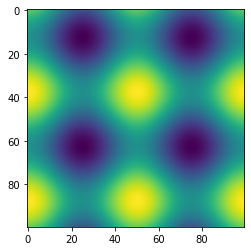

In [11]:
f = np.empty((m,n))
for i in range(m):
    for j in range(n):
        f[i,j] = -np.sin(4*np.pi*i/m) + np.cos(4*np.pi*j/n)
        
plt.imshow(f)

In [12]:
t0 = time.monotonic()
vals, imap = bats.lower_star_filtration(X, f.flatten())
t1 = time.monotonic()
print("time to extend: {} sec.".format(t1 - t0))

time to extend: 0.009098205002374016 sec.


In [13]:
t0 = time.monotonic()
R.update_filtration(vals)
t1 = time.monotonic()
print("time to update: {} sec.".format(t1 - t0))

time to update: 0.09336388399242423 sec.


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Birth', ylabel='Death'>)

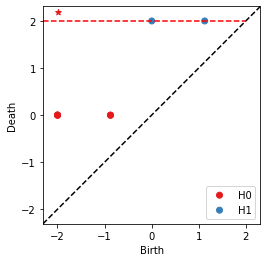

In [14]:
ps = R.persistence_pairs(0) + R.persistence_pairs(1)
bats.persistence_diagram(ps)

In [15]:
nzps = []
for p in ps:
    if p.length() > 0:
        print(p)
        nzps.append(p)

0 : (-1.99803,inf) <1225,-1>
0 : (-1.99803,0.00197327) <1275,3529>
0 : (-1.99803,-0.00197327) <6225,11498>
0 : (-1.99803,-0.00197327) <6275,11648>
0 : (-0.874667,-0.00197327) <9925,26398>
0 : (-0.874667,-0.00197327) <9975,26548>
1 : (0.00197327,1.99803) <18429,7625>
1 : (1.12533,1.99803) <29455,17525>


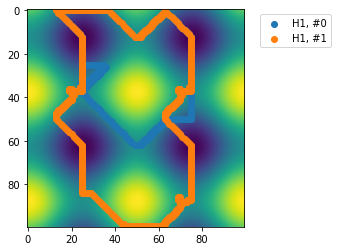

In [16]:
# visualization of a representative
plt.imshow(f, origin='upper')

for pi, p in enumerate(nzps[-2:]):
    c = R.representative(p)
    d = p.dim()
    skel0 = []
    for i in c.nzinds():
        skel0.extend(X.get_simplex(d, i))

    skel0 = np.unique(skel0)


    xx = skel0 % m
    yy = skel0 // m
    plt.scatter(xx[:],yy[:],label="H{}, #{}".format(d, pi))
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [17]:
p = nzps[-1]
print(p)

1 : (1.12533,1.99803) <29455,17525>


## Compare to doing reduction again

time to construct: 0.01627889700466767 sec.
time to reduce: 0.11104438400070649 sec.


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Birth', ylabel='Death'>)

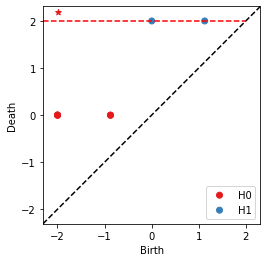

In [18]:
t0 = time.monotonic()
F2 = bats.FilteredSimplicialComplex(X, vals)
t1 = time.monotonic()
print("time to construct: {} sec.".format(t1 - t0))

t0 = time.monotonic()
R2 = bats.reduce(F2, bats.F2())
t1 = time.monotonic()
print("time to reduce: {} sec.".format(t1 - t0))

ps = R2.persistence_pairs(0) + R2.persistence_pairs(1)
bats.persistence_diagram(ps)

In [19]:
nzps = []
for p in ps:
    if p.length() > 0:
        print(p)
        nzps.append(p)

0 : (-1.99803,inf) <1225,-1>
0 : (-1.99803,0.00197327) <1275,3529>
0 : (-1.99803,-0.00197327) <6225,11498>
0 : (-1.99803,-0.00197327) <6275,11648>
0 : (-0.874667,-0.00197327) <9925,26398>
0 : (-0.874667,-0.00197327) <9975,26548>
1 : (0.00197327,1.99803) <18429,7625>
1 : (1.12533,1.99803) <29455,17525>


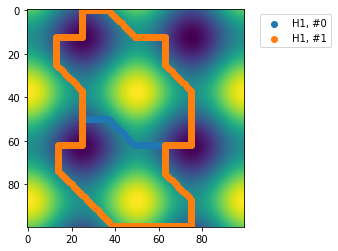

In [20]:
# visualization of a representative
plt.imshow(f, origin='upper')

for pi, p in enumerate(nzps[-2:]):
    c = R2.representative(p)
    d = p.dim()
    skel0 = []
    for i in c.nzinds():
        skel0.extend(X.get_simplex(d, i))

    skel0 = np.unique(skel0)


    xx = skel0 % m
    yy = skel0 // m
    plt.scatter(xx[:],yy[:],label="H{}, #{}".format(d, pi))
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## Go back to original levelset filtration

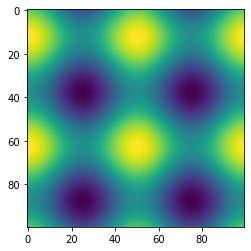

In [21]:
f = np.empty((m,n))
for i in range(m):
    for j in range(n):
        f[i,j] = np.sin(4*np.pi*i/m) + np.cos(4*np.pi*j/n)
        
plt.imshow(f)

time to extend: 0.011447354991105385 sec.
time to update: 0.06726073300524149 sec.


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Birth', ylabel='Death'>)

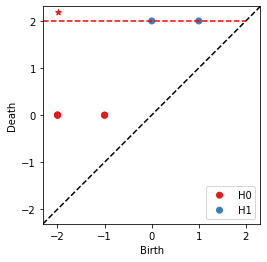

In [22]:
t0 = time.monotonic()
vals, imap = bats.lower_star_filtration(X, f.flatten())
t1 = time.monotonic()
print("time to extend: {} sec.".format(t1 - t0))

t0 = time.monotonic()
R.update_filtration(vals)
t1 = time.monotonic()
print("time to update: {} sec.".format(t1 - t0))

ps = R.persistence_pairs(0) + R.persistence_pairs(1)
bats.persistence_diagram(ps)

In [23]:
nzps = []
for p in ps:
    if p.length() > 0:
        print(p)
        nzps.append(p)

0 : (-1.99803,inf) <3725,-1>
0 : (-1.99803,0.00197327) <3775,10979>
0 : (-1.99803,-0.00197327) <8825,18948>
0 : (-1.99803,-0.00197327) <8875,19098>
0 : (-1,-0.00197327) <51,4048>
0 : (-1,-0.00197327) <151,4198>
1 : (0.00197327,1.99803) <26177,12575>
1 : (1,1.99803) <203,2675>


''

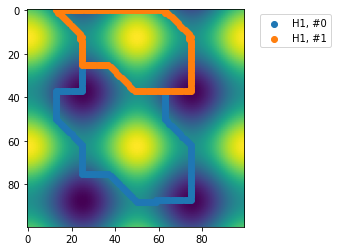

In [24]:
# visualization of a representative
plt.imshow(f, origin='upper')

for pi, p in enumerate(nzps[-2:]):
    c = R.representative(p)
    d = p.dim()
    skel0 = []
    for i in c.nzinds():
        skel0.extend(X.get_simplex(d, i))

    skel0 = np.unique(skel0)


    xx = skel0 % m
    yy = skel0 // m
    plt.scatter(xx[:],yy[:],label="H{}, #{}".format(d, pi))
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
;

# Visualize Critical Simplices
These are the simplices that birth and kill a homology class

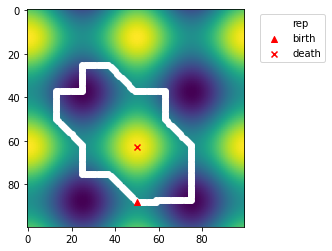

In [25]:
p = nzps[-2]
d = p.dim()
plt.imshow(f)

# representative
c = R.representative(p)
skel0 = []
for i in c.nzinds():
    skel0.extend(X.get_simplex(d, i))

skel0 = np.unique(skel0)
xx = skel0 % m
yy = skel0 // m
plt.scatter(xx[:],yy[:],c='w',label="rep")

bskel = np.array([imap[d][p.birth_ind()]])
xx = bskel % m
yy = bskel // m
plt.scatter(xx[:],yy[:],  c='r', marker='^', label="birth")
if p.death_ind() != 18446744073709551615:
    dskel = np.array([imap[d+1][p.death_ind()]])
    xx = dskel % m
    yy = dskel // m
    plt.scatter(xx[:],yy[:], c='r', marker='x', label="death")
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Optimization Over Persistence Diagrams

Let's try maximizing the sum of H1 lengths.  We want to do this by decreasing H1 births and increasing H1 deaths.

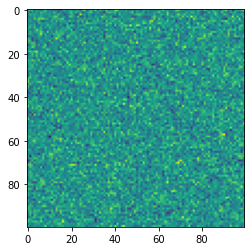

In [26]:
f = np.random.randn(m,n)
plt.imshow(f);

In [27]:
from tqdm import tqdm # progress bar

In [28]:
lr = 0.1 # persistence penalty

f0 = f
f = f.flatten()
t0 = time.monotonic()
vals, imap = bats.lower_star_filtration(X, f)
F = bats.FilteredSimplicialComplex(X, vals)
R = bats.reduce(F, bats.F2())
t1 = time.monotonic()
print("initialization: {} sec.".format(t1-t0))

for i in range(20):
    # extend filtration
    t0a = time.monotonic()
    vals, imap = bats.lower_star_filtration(X, f)
    t1 = time.monotonic()
    print("\textension: {} sec.".format(t1 - t0a))
    # compute persistence
    t0 = time.monotonic()
    R.update_filtration(vals)
    t1 = time.monotonic()
    print("\tupdate: {} sec.".format(t1 - t0))
    # get 1-dimensional pairs
    t0 = time.monotonic()
    ps = R.persistence_pairs(1)
    t1a = time.monotonic()
    print("\tpairs: {} sec.".format(t1a - t0))
    print("iter {}: {} sec.".format(i, t1a-t0a))
    for p in ps:
        d = p.dim()
        bi = imap[d][p.birth_ind()] # maps birth_ind to pixel where it appeared
        di = imap[d+1][p.death_ind()] # maps death_ind to pixel where it appeared
        f[bi] = f[bi] - lr
        f[di] = f[di] + lr


initialization: 0.12452736501290929 sec.
	extension: 0.01198058799491264 sec.
	update: 0.012891090998891741 sec.
	pairs: 0.01688381600251887 sec.
iter 0: 0.04187525299494155 sec.
	extension: 0.0095701980026206 sec.
	update: 0.015859977007494308 sec.
	pairs: 0.013775316008832306 sec.
iter 1: 0.03934112000570167 sec.
	extension: 0.01204249300644733 sec.
	update: 0.019364260995644145 sec.
	pairs: 0.013115185996866785 sec.
iter 2: 0.04467531600676011 sec.
	extension: 0.010225412988802418 sec.
	update: 0.01936413301154971 sec.
	pairs: 0.013867625006241724 sec.
iter 3: 0.04360571199504193 sec.
	extension: 0.011405949990148656 sec.
	update: 0.019780317990807816 sec.
	pairs: 0.013079473006655462 sec.
iter 4: 0.0444084019982256 sec.
	extension: 0.00919139500183519 sec.
	update: 0.020532266004011035 sec.
	pairs: 0.013455712993163615 sec.
iter 5: 0.043323253994458355 sec.
	extension: 0.011502898996695876 sec.
	update: 0.02375145399128087 sec.
	pairs: 0.015633385002729483 sec.
iter 6: 0.0510255289

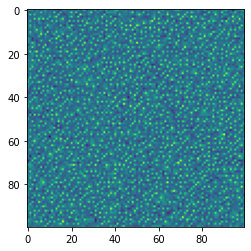

In [29]:
f = f.reshape((m,n))
plt.imshow(f)

## optimization with regularization

we'll add a smoothing parameter

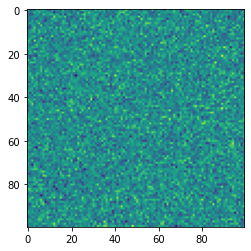

In [30]:
f = np.random.randn(m,n)
plt.imshow(f);

In [31]:
def _get_idx(i, j):
    """
    get index of grid in row-major order
    """
    return j + n * i;

lr = 0.2 # persistence penalty
eps = 0.01 # smoothing parameter

f0 = f
f = f.flatten()
t0 = time.monotonic()
vals, imap = bats.lower_star_filtration(X, f)
F = bats.FilteredSimplicialComplex(X, vals)
R = bats.reduce(F, bats.F2())
t1 = time.monotonic()
print("initialization: {} sec.".format(t1-t0))

for i in range(20):
    # extend filtration
    t0a = time.monotonic()
    vals, imap = bats.lower_star_filtration(X, f)
    t1 = time.monotonic()
    print("\textension: {} sec.".format(t1 - t0a))
    # compute persistence
    t0 = time.monotonic()
    R.update_filtration(vals)
    t1 = time.monotonic()
    print("\tupdate: {} sec.".format(t1 - t0))
    # get 1-dimensional pairs
    t0 = time.monotonic()
    ps = R.persistence_pairs(1)
    t1a = time.monotonic()
    print("\tpairs: {} sec.".format(t1a - t0))
    print("iter {}: {} sec.".format(i, t1a-t0a))
    # apply smoothing parameter
    f = f.reshape((m,n))
    f[1:-1, 1:-1] = (1-eps) * f[1:-1, 1:-1] + eps/4*(f[:-2, :-2] + f[2:, 2:] + f[:-2,2:] + f[2:,:-2])
    f = f.flatten()
    # apply persistence function
    for p in ps:
        d = p.dim()
        bi = imap[d][p.birth_ind()] # maps birth_ind to pixel where it appeared
        di = imap[d+1][p.death_ind()] # maps death_ind to pixel where it appeared
        f[bi] = f[bi] - lr
        f[di] = f[di] + lr

initialization: 0.1337685120088281 sec.
	extension: 0.011292904004221782 sec.
	update: 0.013314013995113783 sec.
	pairs: 0.0151376449939562 sec.
iter 0: 0.03989499999443069 sec.
	extension: 0.00933767000969965 sec.
	update: 0.020487177011091262 sec.
	pairs: 0.01612955000018701 sec.
iter 1: 0.0461539649986662 sec.
	extension: 0.01094621600350365 sec.
	update: 0.024193475997890346 sec.
	pairs: 0.014683957997476682 sec.
iter 2: 0.04996134499378968 sec.
	extension: 0.011772017998737283 sec.
	update: 0.030769732999033295 sec.
	pairs: 0.015725942997960374 sec.
iter 3: 0.058690517995273694 sec.
	extension: 0.010911883000517264 sec.
	update: 0.03248416598944459 sec.
	pairs: 0.014741296996362507 sec.
iter 4: 0.05827601200144272 sec.
	extension: 0.009494426005403511 sec.
	update: 0.04367480400833301 sec.
	pairs: 0.016220249992329627 sec.
iter 5: 0.06951832000049762 sec.
	extension: 0.014202655002009124 sec.
	update: 0.06390868499875069 sec.
	pairs: 0.014874186992528848 sec.
iter 6: 0.09313156499

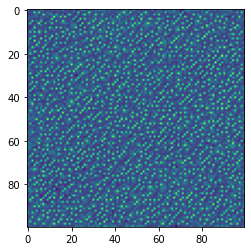

In [32]:
f = f.reshape((m,n))
plt.imshow(f)